In [7]:
##### WeatherPY ######
import random
import sys
import math
from citipy import citipy
import openweathermapy.core as ow
import pandas as pd
import io
import requests
import os
import matplotlib.pyplot as plt
from datetime import datetime

# This csv file read into a list is used to limit the number of failed "gets" on weather data 
# by making sure the city out of citipy is also in this list before being added to the get list
csv_path = os.path.join("weathermapy.csv") 
weather_cities_df = pd.read_csv(csv_path)
weather_city_names = weather_cities_df['nm']
weather_cities = weather_city_names.tolist()

# Randomly generate lat and long coordinates
radius = 10000000                         #Choose your own radius
radiusInDegrees=radius/111300            
r = radiusInDegrees
x0 = 0.00
y0 = 0.00
city_list = []
city_count = 0
for i in range(1,2000):                 #Choose number of Lat Long to be generated
    u = float(random.uniform(0.0,1.0))
    v = float(random.uniform(0.0,1.0))
    w = r * math.sqrt(u)
    t = 2 * math.pi * v
    x = w * math.cos(t) 
    y = w * math.sin(t)
    xLat  = x + x0
    yLong = y + y0
    
    # from citipy find nearest city to the random coordinates
    city = citipy.nearest_city(xLat, yLong)
    city_name = city.city_name.title()
    
    # if not duplicate (already in city_list) and city in open weather mapy 
    if city_name not in city_list and city_name in weather_cities: 
        # print(city_name)
        # print("xlat = " + str(xLat) + " ylong = " + str(yLong))
        city_list.append(city_name)
        city_count += 1
        if city_count == 550: # allow extra for any failed gets so stop at 550 instead of 500 
            # print("550 cities found")
            break

# Set up items to be used for getting the city and what columns need to be returned
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
settings = {"units": "imperial", "appid": api_key}
summary = ["clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]
weather_data = []
weather_list = []

# loop through the cities list and try to get weather date for each 
for city in city_list:
    try:
        weather_data = weather_data + [ow.get_current(city, **settings)]
        print('http://api.openweathermap.org/data/2.5/weather?appid={}&q={}&units=Imperial'.format(api_key, city))
        weather_list.append(city)
        # Skip out after after reaching 500
        if len(weather_list) == 500:
            break#
    except Exception as e:  # for failed gets display city and error message
        print("Skipped " + bad_city + " " + str(e))
        
data = [response(*summary) for response in weather_data]

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Cape Town&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hamilton&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ostrovnoy&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Torbay&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Necochea&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Lagoa&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Hithadhoo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bam&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Ribeira Grande&units=Im

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Port Alfred&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Iznoski&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Skjervoy&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Opuwo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Awbari&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=La Rochelle&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Eyl&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mouila&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Tarnogskiy Gorodok&unit

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bonavista&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=General Roca&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Chimbote&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Jawhar&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Horta&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Porbandar&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Nalut&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Grindavik&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Padang&units=Impe

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Salamiyah&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Coihaique&units=Imperial
Skipped Novy Jicin HTTP Error 404: Not Found
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bonthe&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Saldanha&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Toamasina&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Libreville&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Chinchani&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Nantucket&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=2

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Tromso&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Kayes&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Luanda&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Damghan&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Colares&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Santa Cecilia&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Inongo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Adeje&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Chimoio&units=Imperial
ht

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mandiana&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Mbanza-Ngungu&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Esmeraldas&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Cervo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=El Alto&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Dois Corregos&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Gutersloh&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Bousse&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Eirunepe&

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Djibo&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Manicore&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Santa Rosa&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Paveh&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Vadso&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Imbituva&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Sanmartin&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Nowy Targ&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=Khislavichi&units=Imp

In [9]:
column_names = ["Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
weather_data = pd.DataFrame(data, index=weather_list, columns=column_names)
weather_data = weather_data.reset_index()
weather_data = weather_data.rename(index=str, columns={"index": "City"})
 # convert from unix date to timestamp date for readability 
weather_data['Date'] = pd.to_datetime(weather_data['Date'],unit='s')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,0,ZA,2018-02-28 05:00:00,87,-33.93,18.42,60.80,8.05
1,Hamilton,75,BM,2018-02-28 04:55:00,51,32.30,-64.78,62.60,13.87
2,Ostrovnoy,24,RU,2018-02-28 05:56:53,81,68.05,39.51,8.43,17.36
3,Torbay,90,CA,2018-02-28 05:00:00,100,47.66,-52.73,28.40,13.87
4,Necochea,76,AR,2018-02-28 05:56:54,95,-38.55,-58.74,61.71,3.83


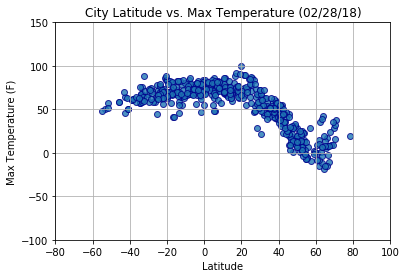

In [10]:
# reformat date from first row of df to print as mm/dd/yy on titles of scatter plots
date_string = str(weather_data['Date'].iloc[0])
date_time_format = datetime.strptime(date_string,'%Y-%m-%d %H:%M:%S')
title_date = datetime.strftime(date_time_format, '%m/%d/%y')
title_date = " (" + title_date + ")"

# Plot for City Latitude vs. Max Temperature
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"],
            edgecolor="darkblue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + title_date)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-100, 150])

# Save the figure
plt.savefig("City_Latitude_Temperature.png")

# Show plot
plt.show()

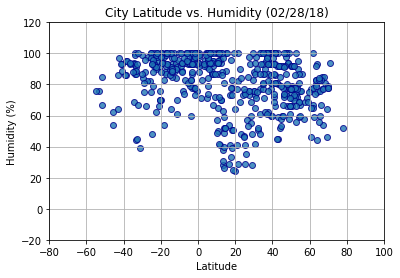

In [11]:
# Plot for City Latitude vs. Humidity (%)
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"],
            edgecolor="darkblue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity" + title_date)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("City_Latitude_Humidity.png")

# Show plot
plt.show()

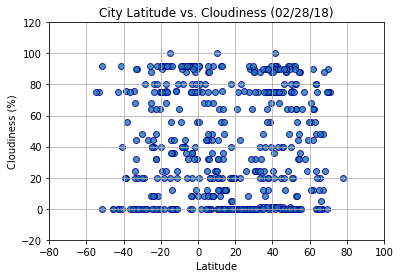

In [12]:
# Plot for City Latitude vs. Cloudiness (%)
plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"],
            edgecolor="darkblue", linewidths=1, marker="o", 
            alpha=0.8, label="Zip Codes")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + title_date)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])

# Save the figure
plt.savefig("City_Latitude_Cloudiness.png")

# Show plot
plt.show()

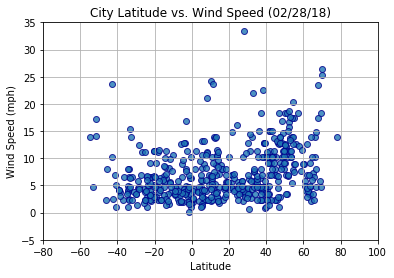

In [13]:
# Plot for City Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], 
            weather_data["Wind Speed"],
            edgecolor="darkblue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + title_date)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 35])

# Save the figure
plt.savefig("City_Latitude_Wind_Speed.png")

# Show plot
plt.show()